<a href="https://colab.research.google.com/github/mawadaabdalla/Spotify-Music-Analysis/blob/main/Copy_of_final_project222_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries 

In [ ]:
#data
import pandas as pd
import numpy as np
import re
#Visulizing
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.io as pio
#regression
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.linear_model import Lasso #Lasso regression model
from sklearn.linear_model import Ridge #Ridge Regression Model
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.metrics import mean_absolute_error 
from sklearn import preprocessing
#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify as sq

In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=70d1f557c43986472d3bf6bb562be511070759ef8ead433d14cd1c71c73de952
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
import pycountry

# Import Data

In [ ]:
Songs_df = pd.read_csv('/content/datacamp_workspace_export_2022-08-25 14_08_50.csv')

# structure of the data

In [ ]:
Songs_df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"""Hey, Soul Sister""",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
Songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [ ]:
# Check for null values
Songs_df.isnull().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

Calculating the number of songs by each of the artists

In [ ]:
#Calculating the number of songs by each of the artists
print(Songs_df.groupby('artist').size())
popular_artist=Songs_df.groupby('artist').size()
print(popular_artist)
artist_list=Songs_df['artist'].values.tolist()

artist
3OH!3                   1
5 Seconds of Summer     1
A Great Big World       1
Adam Lambert            2
Adele                  10
                       ..
ZAYN                    5
Zara Larsson            1
Zedd                    6
fun.                    2
will.i.am               1
Length: 184, dtype: int64
artist
3OH!3                   1
5 Seconds of Summer     1
A Great Big World       1
Adam Lambert            2
Adele                  10
                       ..
ZAYN                    5
Zara Larsson            1
Zedd                    6
fun.                    2
will.i.am               1
Length: 184, dtype: int64


Calculating the number of songs of each genre

In [ ]:
#Calculating the number of songs of each genre
print(type(Songs_df['top genre']))
popular_genre=Songs_df.groupby('top genre').size().unique
print(popular_genre)
genre_list=Songs_df['top genre'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of top genre
acoustic pop                   2
alaska indie                   1
alternative r&b                1
art pop                        8
atl hip hop                    5
australian dance               6
australian hip hop             1
australian pop                 5
barbadian pop                 15
baroque pop                    2
belgian edm                    2
big room                      10
boy band                      15
british soul                  11
brostep                        2
canadian contemporary r&b      9
canadian hip hop               2
canadian latin                 1
canadian pop                  34
candy pop                      2
celtic rock                    1
chicago rap                    1
colombian pop                  3
complextro                     6
contemporary country           1
dance pop                    327
danish pop                     1
detroit hip hop                2

# Data Preprocessing

##Remove white spaces from columns titles and genre

In [ ]:
Songs_df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [ ]:
Songs_df.columns = Songs_df.columns.str.strip()

In [ ]:
Songs_df.rename(columns={'title':'song', 'top genre':'genre', 'bpm':'beats_per_minute','nrgy':'energy',
                    'dnce':'danceability','dB':'loudness','live':'liveness', 'val':'valence', 'dur':'length', 'acous':'acousticness',
                    'spch':'speechiness','pop':'popularity'}, inplace=True)

In [ ]:
Songs_df.song.nunique(),len(Songs_df)
Songs_df = Songs_df.loc[~Songs_df.duplicated(subset='song')].copy().reindex()

In [ ]:
Songs_df.head()

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,"""Hey, Soul Sister""",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


#Feature Engineering

Calculating number of songs / artists / genres in our data

In [ ]:
number_songs=Songs_df['song'].nunique()
number_artists=Songs_df['artist'].nunique()
number_genres=Songs_df['genre'].nunique()
print('number_songs =', number_songs)
print('number_artists =', number_artists)
print('number_genres =', number_genres)

number_songs = 584
number_artists = 184
number_genres = 50


In [ ]:
Songs_df[['beats_per_minute',	'energy',	'danceability',	'loudness',	'liveness',	'valence',	'length',	'acousticness',	'speechiness',	'popularity']].describe()

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,118.599315,70.546233,64.467466,-5.568493,17.852740,52.270548,224.335616,14.214041,8.277397,66.369863
std,24.844430,16.275962,13.379625,2.831234,13.154272,22.535021,34.018667,20.595602,7.316546,14.635310
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,59.750000
50%,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,220.000000,6.000000,5.000000,69.000000
75%,128.250000,82.000000,73.000000,-4.000000,24.000000,69.250000,239.000000,17.000000,9.000000,76.000000
max,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [ ]:
Songs_df.groupby('genre')['popularity'].sum()

genre
acoustic pop                   117
alaska indie                    36
alternative r&b                 84
art pop                        502
atl hip hop                    201
australian dance               374
australian hip hop              70
australian pop                 327
barbadian pop                  981
baroque pop                    135
belgian edm                    120
big room                       656
boy band                      1045
british soul                   540
brostep                        172
canadian contemporary r&b      547
canadian hip hop               147
canadian latin                  18
canadian pop                  2223
candy pop                      117
celtic rock                     80
chicago rap                     73
colombian pop                  168
complextro                     404
contemporary country            76
dance pop                    20790
danish pop                      80
detroit hip hop                147
downtempo     

In [ ]:
Songs_df.groupby(['year','genre'])['popularity'].sum()

year  genre          
2010  art pop             58
      atl hip hop        173
      australian pop     125
      barbadian pop      130
      big room             0
                        ... 
2019  electronic trap     77
      electropop         323
      escape room        180
      latin               76
      pop                785
Name: popularity, Length: 145, dtype: int64

In [ ]:
Songs_df.groupby('genre')['beats_per_minute',	'energy',	'danceability',	'loudness',	'liveness',	'valence',	'length',	'acousticness',	'speechiness',	'popularity'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
genre,,,,,,,,,,
acoustic pop,185,84,55,-4,11,76,255,91,5,71
alaska indie,132,34,51,-11,12,7,250,23,3,36
alternative r&b,136,40,90,-9,6,35,198,5,13,84
art pop,150,81,76,-5,36,42,403,75,13,74
atl hip hop,130,86,78,-3,36,65,329,20,39,72
australian dance,192,80,67,-3,15,73,286,85,27,76
australian hip hop,95,72,91,-4,5,38,200,9,7,70
australian pop,186,91,76,-4,38,79,232,27,18,72
barbadian pop,206,91,82,-3,65,89,320,88,24,82


#visualization

In [ ]:
# 10 most popular songs
Songs_df.sort_values(by="popularity", ascending=False).head(10)[["song","artist" ,"popularity"]]

,song,artist,popularity
572,Memories,Maroon 5,99
573,Lose You To Love Me,Selena Gomez,97
574,Someone You Loved,Lewis Capaldi,96
575,Señorita,Shawn Mendes,95
576,How Do You Sleep?,Sam Smith,93
578,Trampoline (with ZAYN),SHAED,92
577,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,92
579,Happier,Marshmello,90
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,90
580,Truth Hurts,Lizzo,90


[Text(0.5, 1.0, '"Most Popular Songs Artists" Popularity Over Time')]

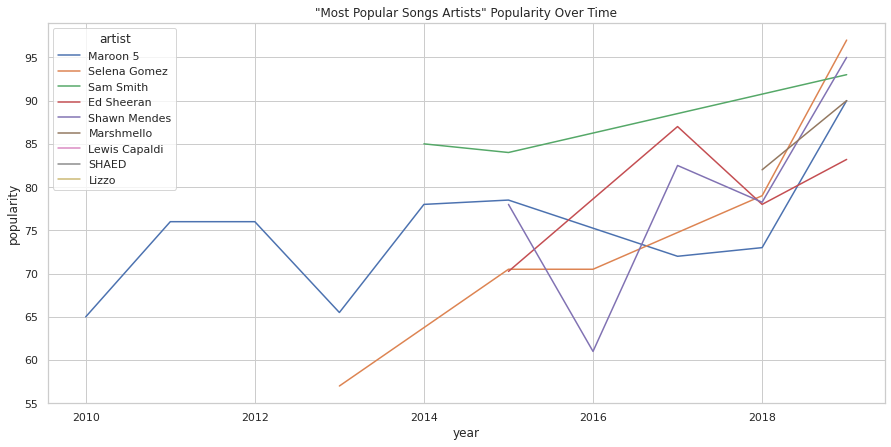

In [ ]:
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_context("notebook")
sns.set_style("whitegrid")
mst_pop_songs_art = Songs_df.sort_values(by="popularity", ascending=False).head(10)["artist"].tolist()
sns.lineplot(x="year", y="popularity", data=Songs_df[Songs_df["artist"].isin(mst_pop_songs_art)], hue="artist", ci=None).set(
    title = '"Most Popular Songs Artists" Popularity Over Time')

Text(0.5, 1.0, 'Top 10 beats_per_minute of 2010-2019')

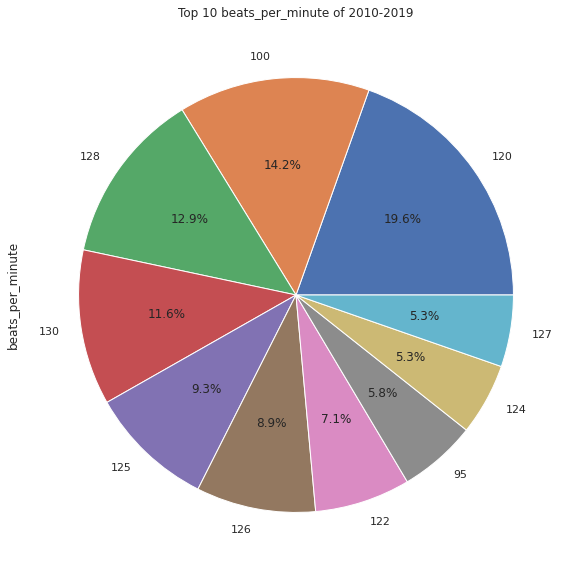

In [ ]:
Songs_df['beats_per_minute'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 beats_per_minute of 2010-2019')

Text(0.5, 1.0, 'Top 10 artist of 2010-2019')

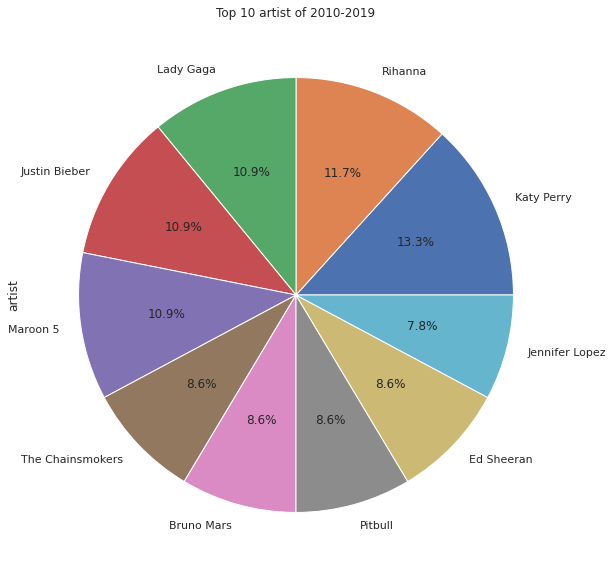

In [ ]:
Songs_df['artist'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 artist of 2010-2019')

In [ ]:
# Songs with highest popularity by year
grouped = Songs_df.groupby(["year"],as_index=False).popularity.max()
merged = Songs_df.merge(grouped, on=["year", "popularity"], how="inner")[["year", "song", "artist", "popularity"]]
merged

,year,song,artist,popularity
0,2010,"""Hey, Soul Sister""",Train,83
1,2011,A Thousand Years,Christina Perri,81
2,2012,Titanium (feat. Sia),David Guetta,80
3,2013,Underneath the Tree,Kelly Clarkson,88
4,2014,All of Me,John Legend,86
5,2015,Thinking out Loud,Ed Sheeran,84
6,2015,I'm Not The Only One,Sam Smith,84
7,2015,The Hills,The Weeknd,84
8,2016,Cake By The Ocean,DNCE,81
9,2016,Don't Let Me Down,The Chainsmokers,81


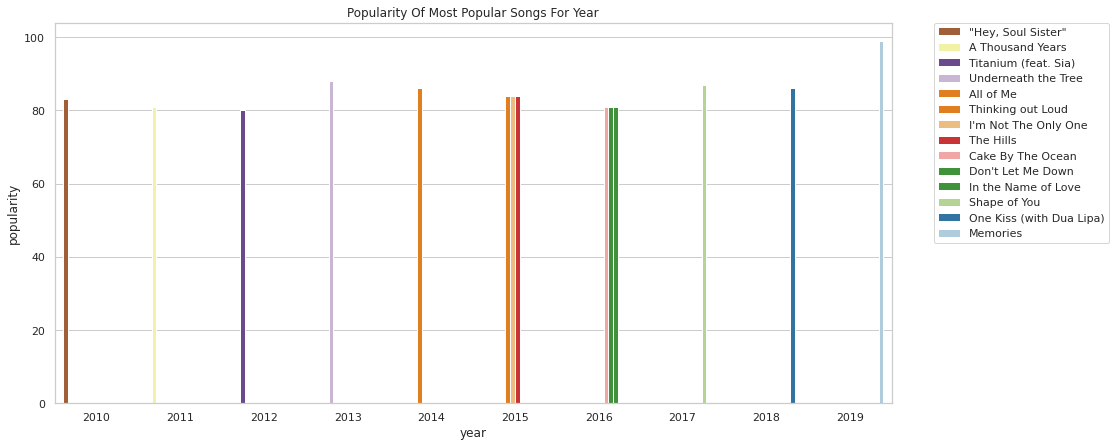

In [ ]:
sns.barplot(x="year", y="popularity", hue="song", data=merged, palette="Paired_r").set(title = "Popularity Of Most Popular Songs For Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# 5 Most popular artists in dataset
Songs_df.groupby("artist", as_index=False).popularity.sum().sort_values("popularity", ascending=False).head(5)

,artist,popularity
114,Maroon 5,1057
86,Katy Perry,1056
83,Justin Bieber,995
145,Rihanna,981
94,Lady Gaga,964


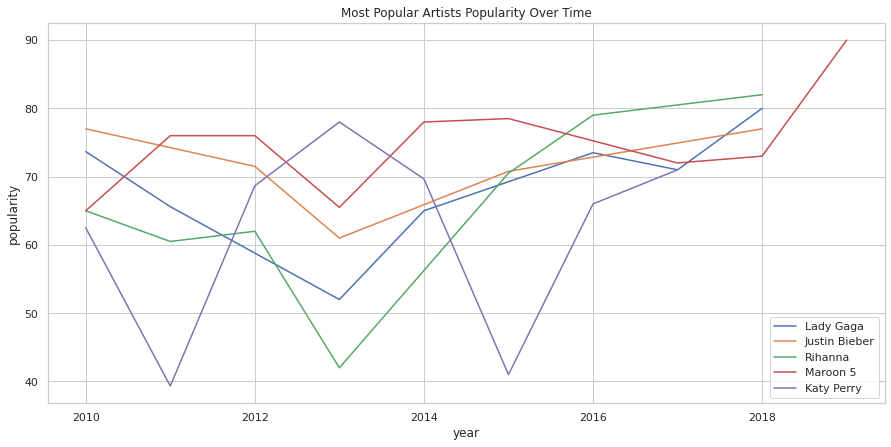

In [ ]:
mst_pop_art = Songs_df.groupby("artist", as_index=False).popularity.sum().sort_values("popularity", ascending=False).head(5)["artist"].tolist()
sns.lineplot(x="year", y="popularity", data=Songs_df[Songs_df["artist"].isin(mst_pop_art)], hue="artist", ci=None).set(title="Most Popular Artists Popularity Over Time")
plt.legend(loc='lower right')

In [ ]:
# 5 genres with highest popularity in dataset
most_popular_genres = Songs_df.groupby("genre", as_index=False).popularity.sum().sort_values("popularity",ascending=False).head(5)
most_popular_genres

,genre,popularity
25,dance pop,20790
48,pop,4113
18,canadian pop,2223
12,boy band,1045
33,electropop,1007


[Text(0.5, 1.0, 'Top Genres Popularity Over Time')]

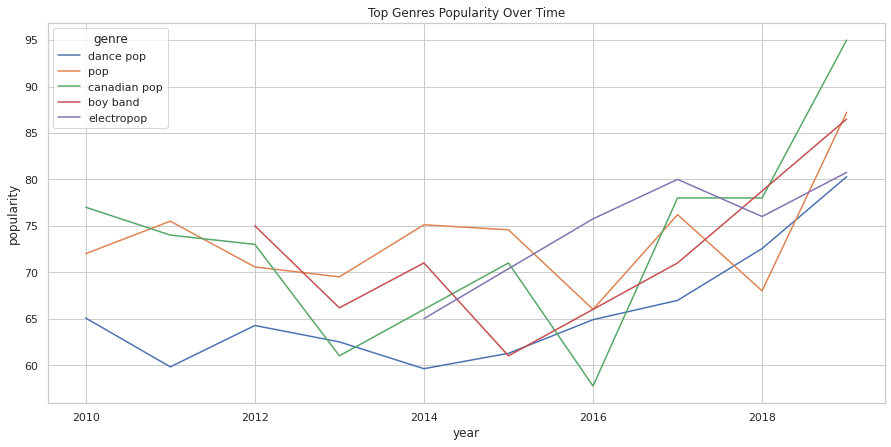

In [ ]:
most_popular_genres_l = most_popular_genres["genre"].tolist()
sns.lineplot(x="year", y="popularity", data=Songs_df[Songs_df["genre"].isin(most_popular_genres_l)], hue="genre", ci=None).set(
    title = "Top Genres Popularity Over Time")

Text(0.5, 1.0, 'Top 10 genre of 2010-2019')

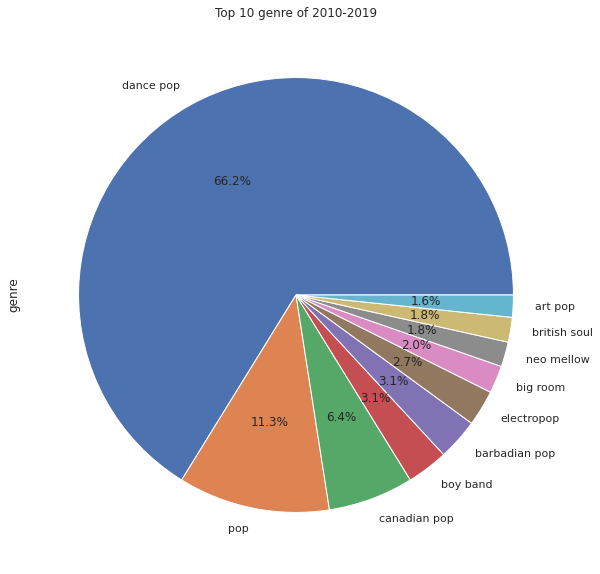

In [ ]:
Songs_df['genre'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 genre of 2010-2019')

In [ ]:
# Select the attributes columns of the dataset
attributes = Songs_df.iloc[:,4:14]

In [ ]:
# Song with max value for each attribute

for x in attributes.columns:
    print(x,":", Songs_df.loc[Songs_df[x].idxmax(), "song"], "--", Songs_df.loc[Songs_df[x].idxmax(), "artist"], "(" + str(Songs_df[x].max()) + ")")

beats_per_minute : FourFiveSeconds -- Rihanna (206)
energy : Hello -- Martin Solveig (98)
danceability : Bad Liar -- Selena Gomez (97)
loudness : 3 -- Britney Spears (-2)
liveness : NO -- Meghan Trainor (74)
valence : Mmm Yeah (feat. Pitbull) -- Austin Mahone (98)
length : TKO -- Justin Timberlake (424)
acousticness : Start -- John Legend (99)
speechiness : How Ya Doin'? (feat. Missy Elliott) -- Little Mix (48)
popularity : Memories -- Maroon 5 (99)


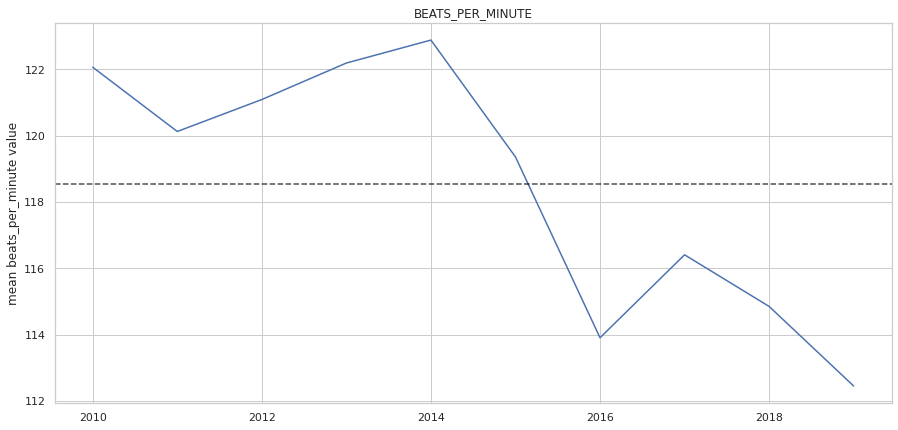

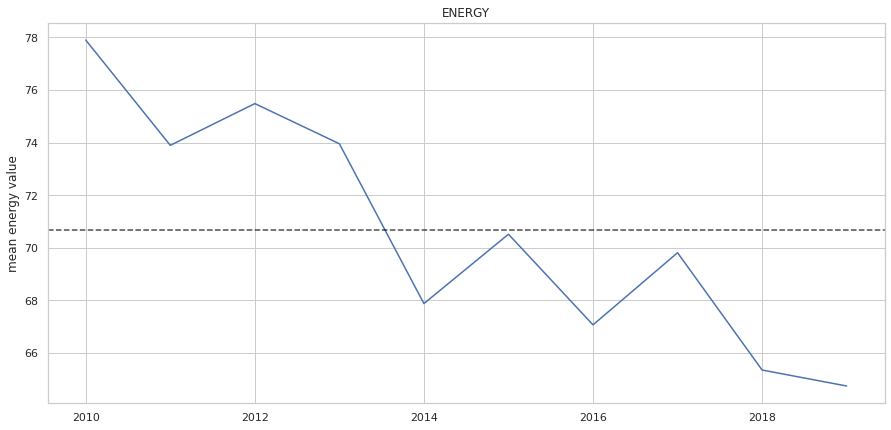

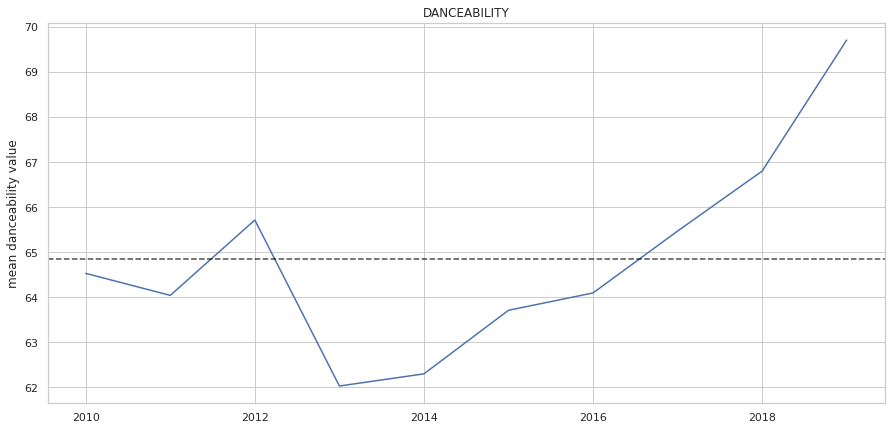

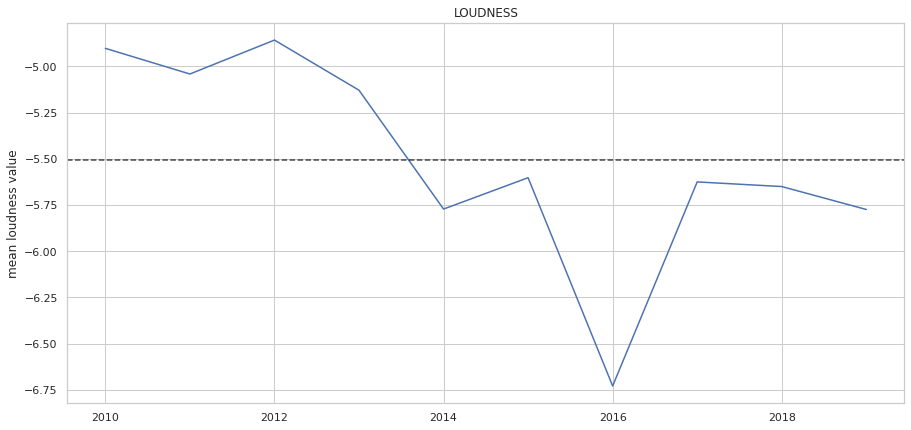

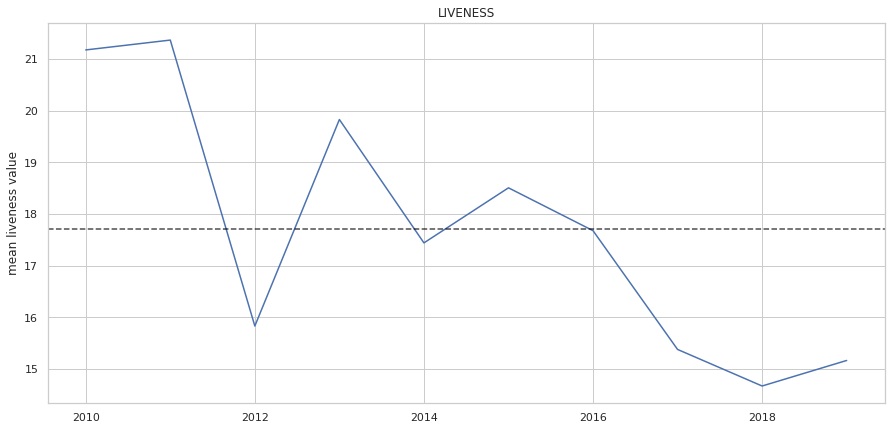

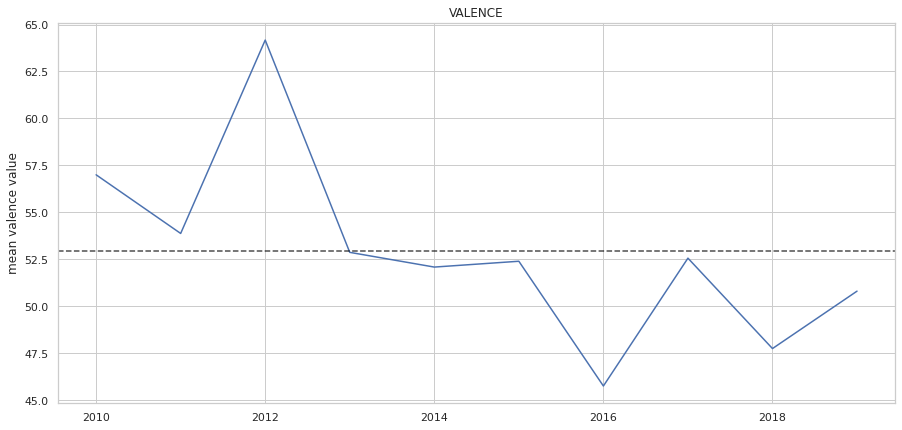

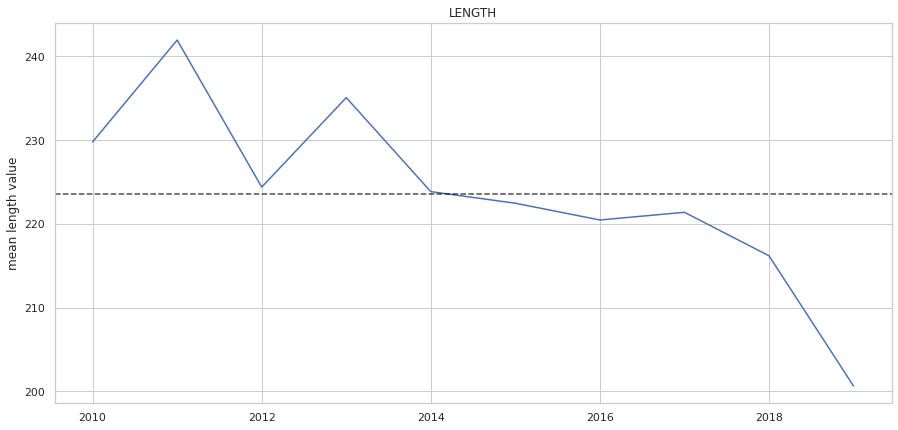

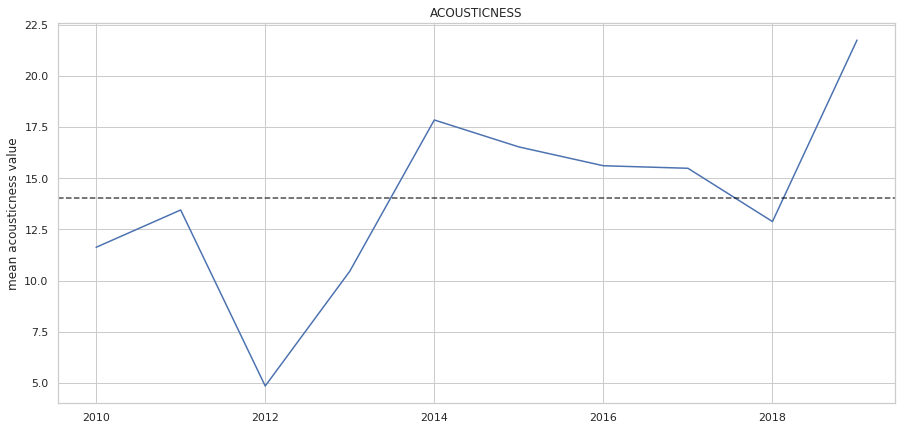

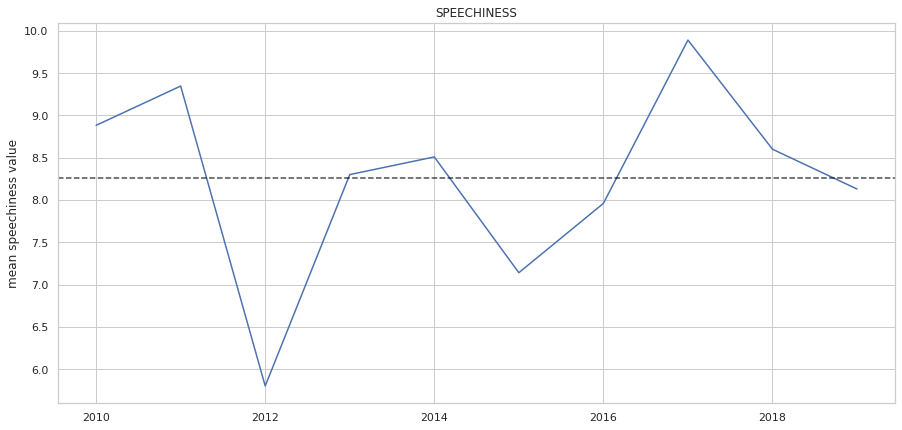

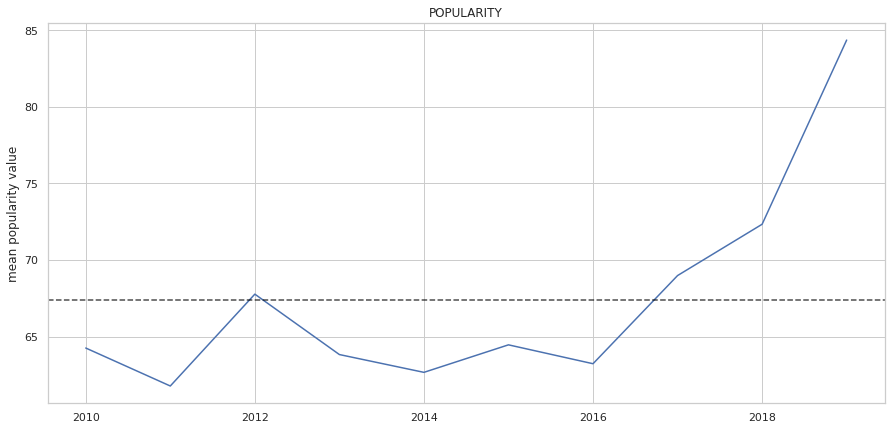

In [ ]:
# Attributes over time
g = Songs_df.groupby("year", as_index=False)[attributes.columns].mean()
for x in attributes.columns:
    plt.plot(g.year, g[x])
    plt.axhline(g[x].mean(), color="black", alpha=0.7, linestyle="--")
    plt.title(x.upper())
    plt.ylabel("mean " + x + " value")
    plt.show()

In [ ]:
# Seaborn palette for heatmap
pal = sns.light_palette("seagreen", as_cmap=True)

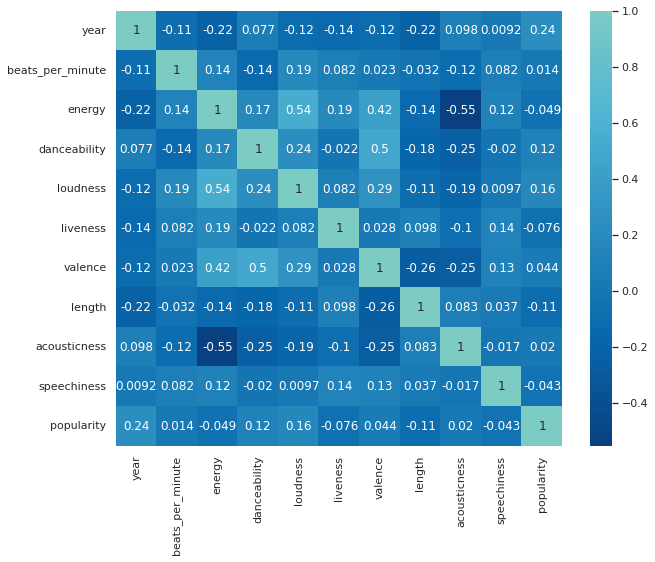

In [ ]:
# Visualize the correlation coefficient for each couple of attributes in a heatmap
corrr = Songs_df.corr()
fig=plt.figure(figsize=(10,8))
sns.heatmap(corrr, annot=True,cmap='GnBu_r', center=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


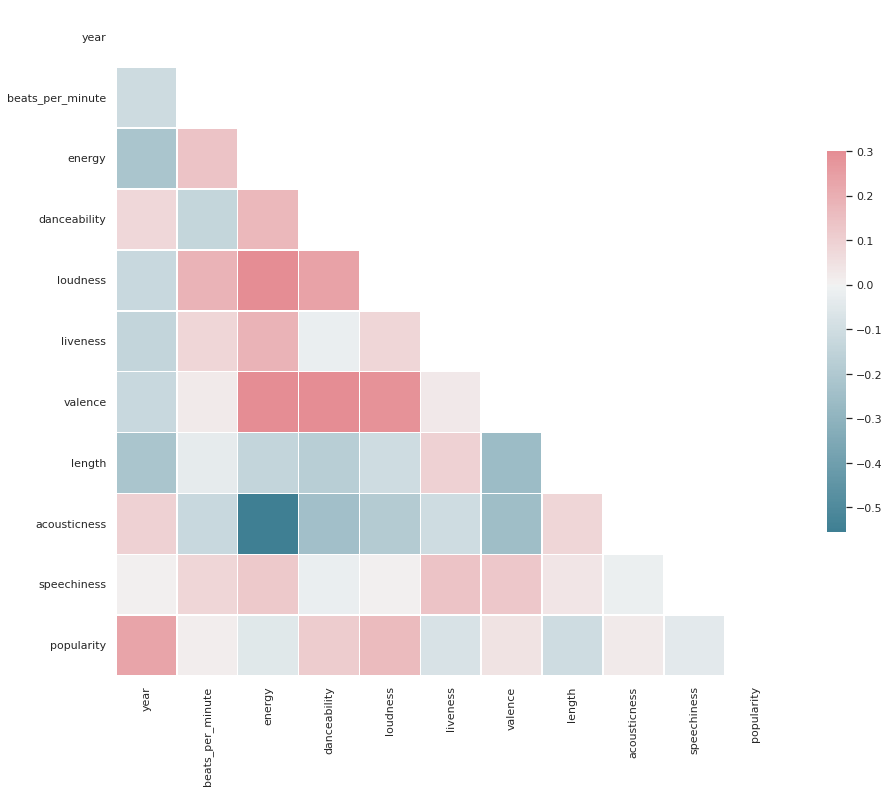

In [ ]:
corr = Songs_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
fig = px.scatter(Songs_df,x='danceability', y='energy',color='energy',hover_name='song',hover_data=['artist','year'])
fig.show()

In [ ]:
fig = px.scatter(Songs_df,x='popularity', y='length',color='length',hover_name='song',hover_data=['artist','year'])
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



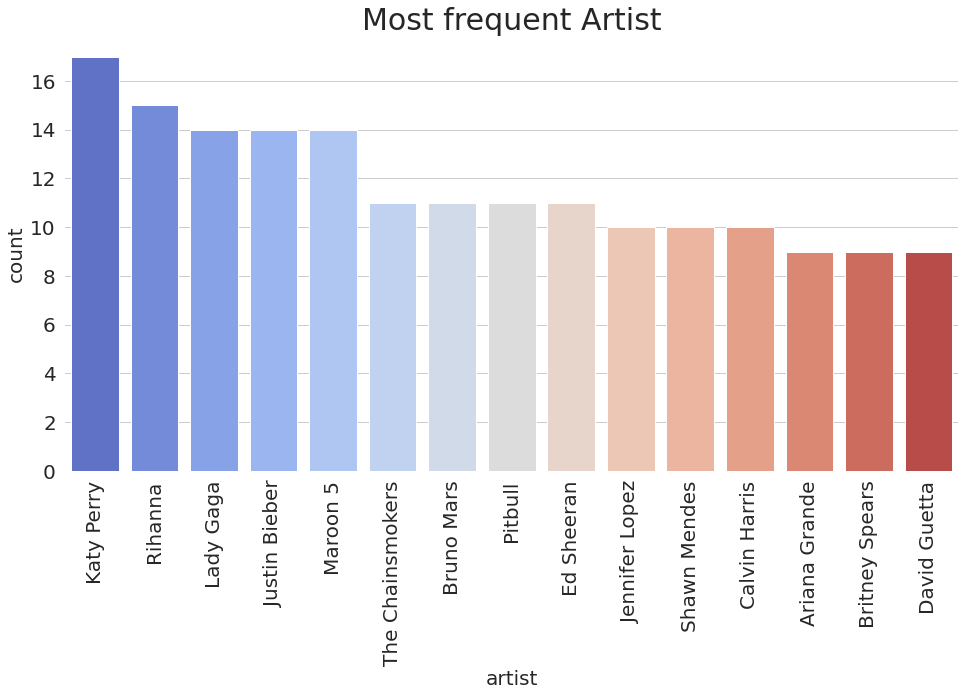

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Most frequent Artist',fontsize=30)
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Count', fontsize=20)

sns.countplot(Songs_df.artist,order=pd.value_counts(Songs_df.artist).iloc[:15].index,palette=sns.color_palette("coolwarm", 15))

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

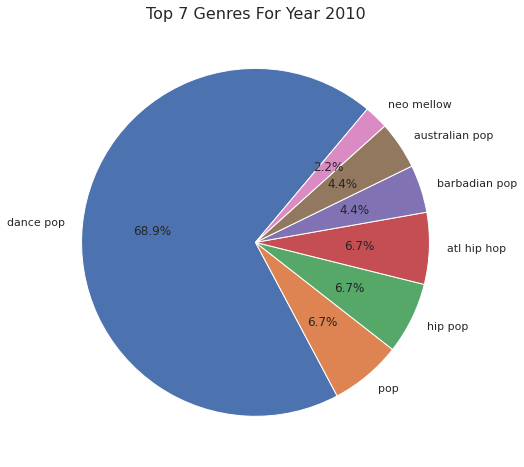

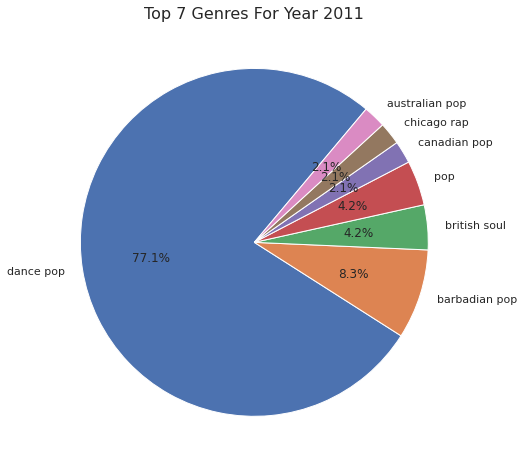

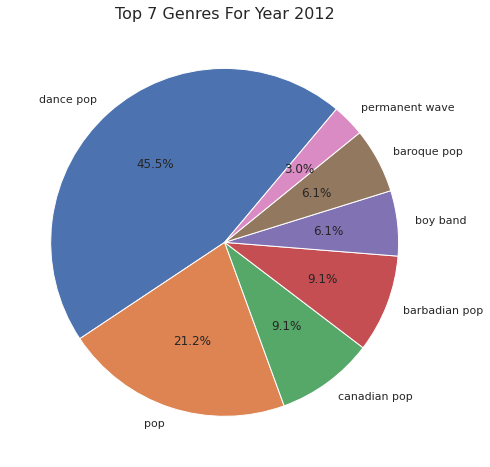

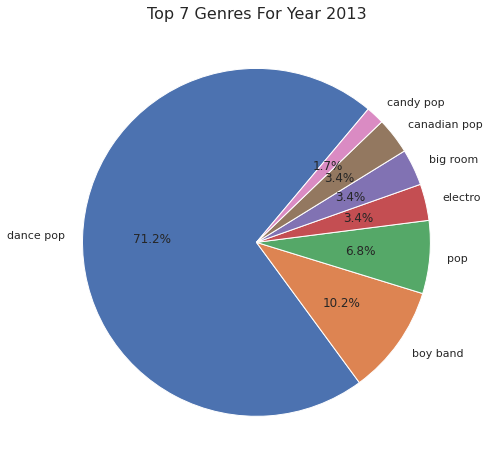

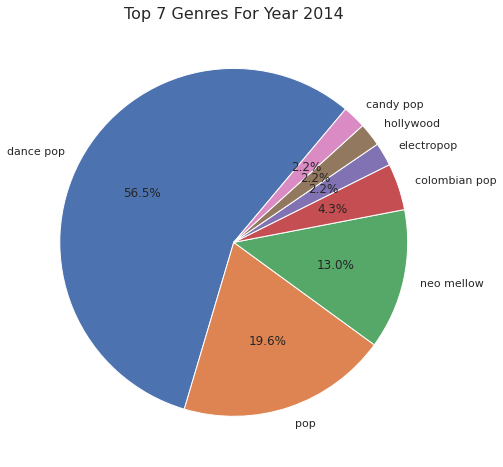

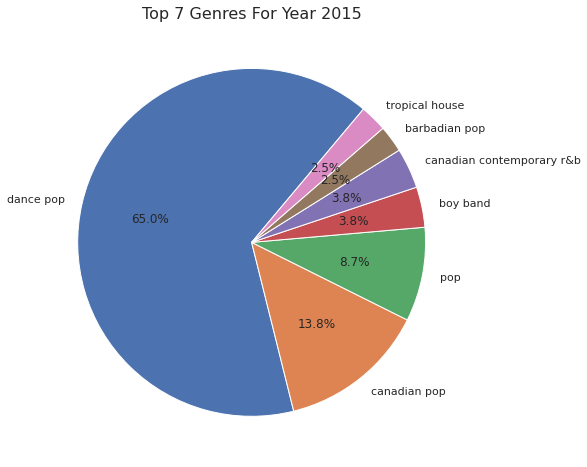

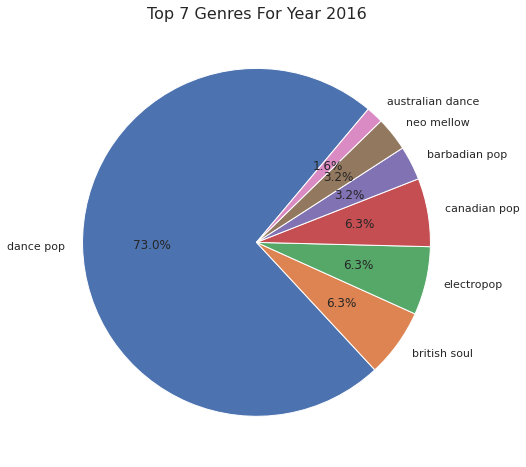

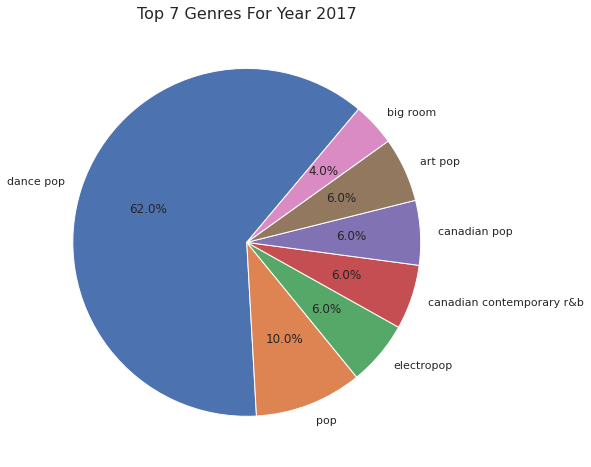

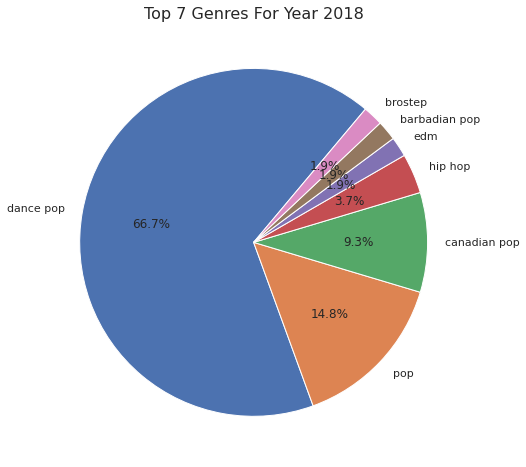

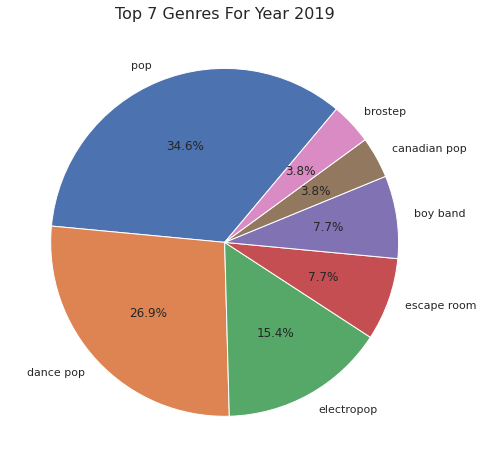

In [ ]:
for x in range(2010, 2020):
    data2 = Songs_df[Songs_df['year'] == x]
    plt.figure(figsize = (10, 8))
    plt.pie(data2['genre'].value_counts().iloc[:7],labels=data2['genre'].value_counts().iloc[:7].index,
    autopct='%1.1f%%', shadow=False, startangle=50)
    plt.title('Top 7 Genres For Year ' + str(x),fontsize=16)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



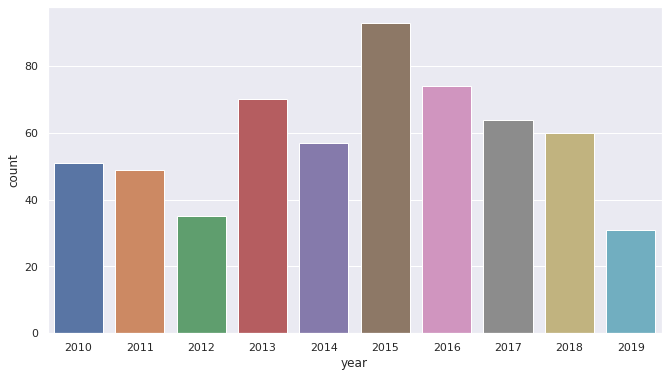

In [ ]:
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(Songs_df['year'])

Text(0.5, 0, 'Year')

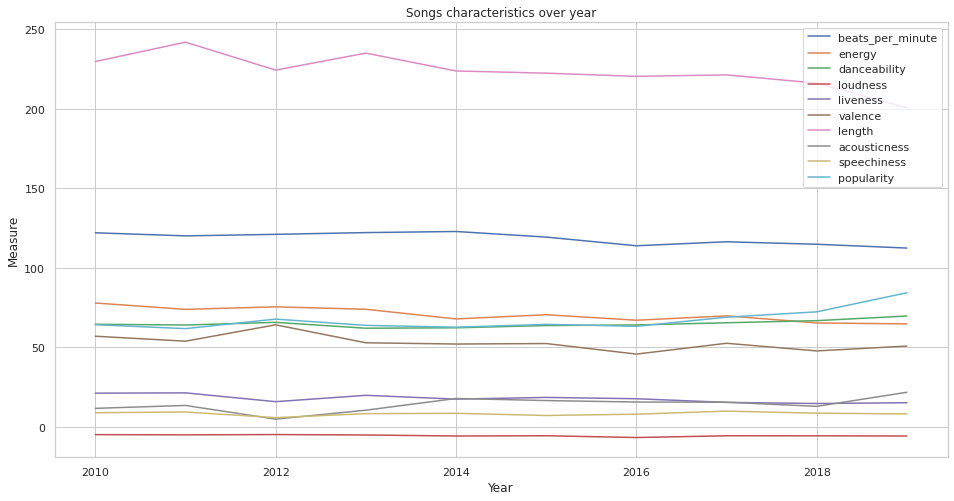

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = [	'beats_per_minute',	'energy',	'danceability',	'loudness',	'liveness',	'valence',	'length',	'acousticness',	'speechiness',	'popularity']
for col in columns:
    x = Songs_df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Songs characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

In [ ]:
px.scatter_polar(Songs_df,theta='genre',r='beats_per_minute',color ='popularity',title='Spread of different genre popularity according to beats per minute')

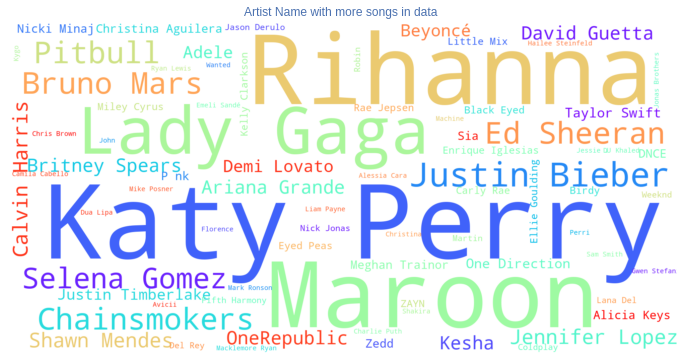

In [ ]:
plt.style.use('seaborn')
wrds1 = Songs_df["artist"]
wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name with more songs in data ",color='b')
plt.show()

In [ ]:
data2 = Songs_df.groupby('year')['genre','popularity'].max() #	'beats_per_minute',	'energy',	'danceability',	'loudness',	'liveness',	'valence',	'length',	'acousticness',	'speechiness',	'popularity'
data2['year'] = data2.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
data2

,genre,popularity,year
year,,,
2010,pop,83,2010
2011,pop,81,2011
2012,pop,80,2012
2013,pop,88,2013
2014,pop,86,2014
2015,tropical house,84,2015
2016,pop,81,2016
2017,pop,87,2017
2018,pop,86,2018


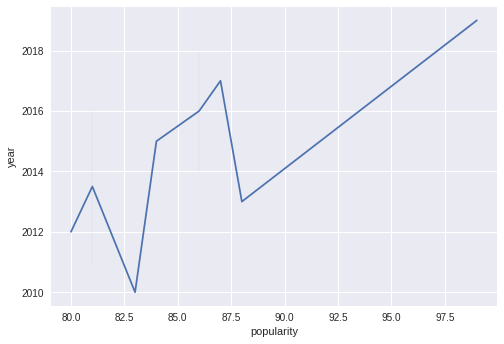

In [ ]:
sns.lineplot(x = 'popularity', y = 'year',data = data2)

In [ ]:
artist_df = Songs_df.groupby('artist').sum().sort_values('popularity',ascending = False)
artist_df=artist_df.reset_index()
artist_df

,artist,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,Maroon 5,28206,1656,961,975,-77,250,768,3029,203,71,1057
1,Katy Perry,34226,2248,1291,1117,-86,357,1018,3811,66,109,1056
2,Justin Bieber,28200,1591,883,883,-94,256,718,2896,368,134,995
3,Rihanna,30193,1880,1027,931,-75,266,778,3480,216,109,981
4,Lady Gaga,28179,1682,1048,896,-73,269,698,3452,113,74,964
...,...,...,...,...,...,...,...,...,...,...,...,...
179,Joey Montana,2016,186,81,70,-3,37,69,225,9,7,29
180,Kelly Rowland,2013,104,78,65,-5,12,45,274,13,6,28
181,Nelly Furtado,2016,98,47,80,-10,7,69,228,25,4,18
182,Jennifer Hudson,2015,109,53,90,-5,8,65,255,0,5,18


In [ ]:
fig= px.bar(x='artist',y='popularity', data_frame= artist_df.head(10), labels={
                     "artist": "Artist",
                     "popularity": "Popularity score"
                 }, title="Top 10 Popular Artists",color='popularity')
fig.update_layout(
    font_color="black",
    title_font_color="black",
)
fig.update_traces(marker_color='limegreen')


fig.show()

In [ ]:
Songs_df.columns

Index(['song', 'artist', 'genre', 'year', 'beats_per_minute', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [ ]:
#Songs_df=Songs_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
Songs_df[['beats_per_minute',	'energy',	'danceability',	'loudness',	'liveness',	'valence',	'length',	'acousticness',	'speechiness',	'popularity']] = Songs_df[['beats_per_minute',	'energy',	'danceability',	'loudness',	'liveness',	'valence',	'length',	'acousticness',	'speechiness',	'popularity']].apply(pd.to_numeric)

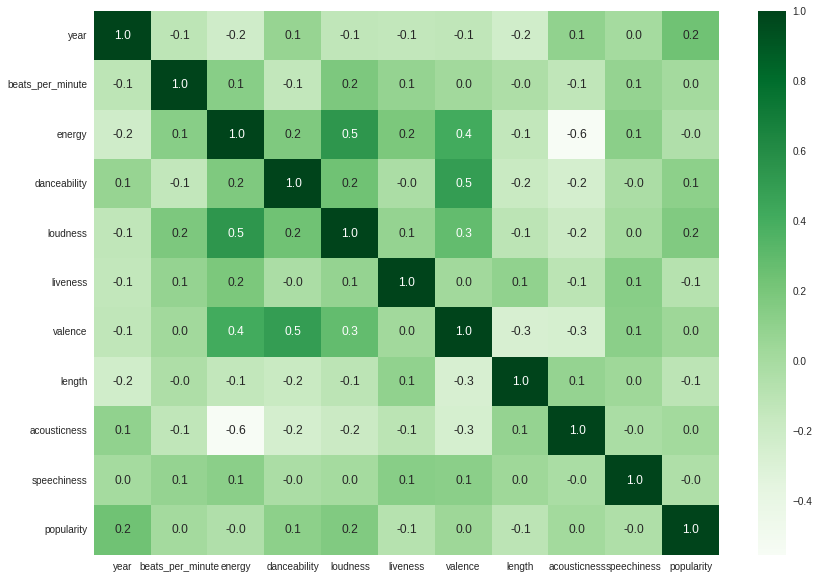

In [ ]:
f,ax=plt.subplots(figsize=(14,10))
sns.heatmap(Songs_df.corr(),annot=True,fmt='.1f',ax=ax,cmap="Greens")

plt.show()

In [ ]:
fig2= px.line(x='year',y='danceability',data_frame=Songs_df,title='Dancebility over the years',labels={
                     "year": "Year",
                     "danceability": "Dancebility score"
                 })
fig2.update_traces(line_color='limegreen', line_width=5)             
fig2.show()

In [ ]:
year_df = Songs_df.groupby('year').sum().sort_values('popularity',ascending = False)
year_df=year_df.reset_index()
year_df

,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,2015,11100,6558,5925,-521,1721,4873,20690,1537,664,5995
1,2016,8429,4963,4743,-498,1308,3386,16315,1155,589,4679
2,2013,8553,5177,4342,-359,1388,3701,16456,732,581,4468
3,2017,7450,4468,4190,-360,984,3364,14169,991,633,4415
4,2018,6891,3921,4008,-339,880,2865,12972,773,516,4340
5,2014,7004,3869,3551,-329,994,2969,12760,1017,485,3572
6,2010,6225,3973,3291,-250,1080,2907,11720,593,453,3277
7,2011,5886,3621,3138,-247,1047,2640,11856,659,458,3027
8,2019,3486,2007,2161,-179,470,1575,6220,674,252,2615
9,2012,4238,2642,2300,-170,554,2246,7854,170,203,2372


In [ ]:
fig= px.bar(x='year',y='popularity', data_frame= year_df.head(10), labels={
                     "year": "Year",
                     "popularity": "Popularity score"
                 }, title="Popularity score over the years",color='popularity')
fig.update_layout(
    font_color="black",
    title_font_color="black",
)
fig.update_traces(marker_color='limegreen')


fig.show()

#Prediction

##for gener prediction

####Linear regression

In [ ]:
Songs_df.loc[Songs_df['genre'].str.contains(pat='pop'),'genre']='pop'
Songs_df.loc[Songs_df['genre'].str.contains(pat='hop'),'genre']='hip hop'
Songs_df.loc[Songs_df['genre'].str.contains(pat='r&b'),'genre']='r&b'
Songs_df.loc[Songs_df['genre'].str.contains(pat='latin'),'genre']='latin'
Songs_df.loc[Songs_df['genre'].str.contains(pat='house'),'genre']='house'
Songs_df.loc[Songs_df['genre'].str.contains(pat='electro'),'genre']='rock'
Songs_df.loc[Songs_df['genre'].str.contains(pat='rock'),'genre']='rock'
Songs_df.loc[Songs_df['genre'].str.contains(pat='belgian edm'),'genre']='rock'

In [ ]:
Songs_df.dtypes

song                object
artist              object
genre               object
year                 int64
beats_per_minute     int64
energy               int64
danceability         int64
loudness             int64
liveness             int64
valence              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object

In [ ]:
ola=(Songs_df["genre"].value_counts()<=4).reset_index()
ola=ola.loc[ola['genre']==True]
ola=ola[['index']]
ola

,index
11,edm
12,house
13,permanent wave
14,downtempo
15,brostep
16,escape room
17,hollywood
18,alaska indie
19,irish singer-songwriter
20,chicago rap


In [ ]:
Songs_df = Songs_df.loc[~Songs_df['genre'].isin(ola['index'])]
Songs_df['genre'].value_counts()

pop                 473
boy band             15
hip hop              13
big room             10
neo mellow            9
british soul          9
r&b                   8
rock                  7
complextro            6
australian dance      6
latin                 5
Name: genre, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Songs_df['genre_encoded'] = le.fit_transform(Songs_df['genre'])
Songs_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,genre_encoded
0,"""Hey, Soul Sister""",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,7
1,Love The Way You Lie,Eminem,hip hop,2010,87,93,75,-5,52,64,263,24,23,82,5
2,TiK ToK,Kesha,pop,2010,120,84,76,-3,29,71,200,10,14,80,8
3,Bad Romance,Lady Gaga,pop,2010,119,92,70,-4,8,71,295,0,4,79,8
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,8
5,Baby,Justin Bieber,pop,2010,65,86,73,-5,11,54,214,4,14,77,8
6,Dynamite,Taio Cruz,pop,2010,120,78,75,-4,4,82,203,0,9,77,8
7,Secrets,OneRepublic,pop,2010,148,76,52,-6,12,38,225,7,4,77,8
8,Empire State of Mind (Part II) Broken Down,Alicia Keys,pop,2010,93,37,48,-8,12,14,216,74,3,76,8
9,Only Girl (In The World),Rihanna,pop,2010,126,72,79,-4,7,61,235,13,4,73,8


In [ ]:
Songs_df.columns

Index(['song', 'artist', 'genre', 'year', 'beats_per_minute', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity', 'genre_encoded'],
      dtype='object')

In [ ]:
num_data=Songs_df.drop(["song","artist","genre","year"],axis=1) #drop all non-numeric columns
X=num_data.drop("genre_encoded",axis=1)
y=num_data["genre_encoded"]

In [ ]:
X

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,97,89,67,-4,8,80,217,19,4,83
1,87,93,75,-5,52,64,263,24,23,82
2,120,84,76,-3,29,71,200,10,14,80
3,119,92,70,-4,8,71,295,0,4,79
4,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...
598,104,66,61,-7,20,16,176,1,3,75
599,95,79,75,-6,7,61,206,21,12,75
600,136,76,53,-5,9,65,260,7,34,70
601,114,79,60,-6,42,24,217,1,7,69


In [ ]:
#Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train

412    8
466    8
29     8
97     8
440    6
      ..
564    8
341    8
588    9
228    8
274    8
Name: genre_encoded, Length: 336, dtype: int64

In [ ]:
Songs_df["genre_encoded"].value_counts()

8     473
2      15
5      13
1      10
7       9
3       9
9       8
10      7
4       6
0       6
6       5
Name: genre_encoded, dtype: int64

In [ ]:
#For that we will create a fuction in order to evaluate and compare models easily
models={"LogReg":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
def fit_and_score (models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    """
    np.random.seed(1)
    model_scores={}
    for name , model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [ ]:
models_eval= pd.DataFrame()

In [ ]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'LogReg': 0.8711111111111111,
 'KNN': 0.8488888888888889,
 'Random Forest': 0.8666666666666667}

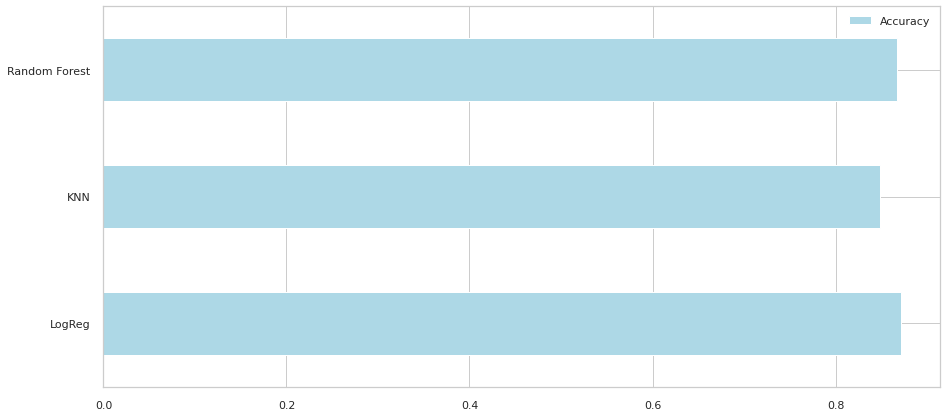

In [ ]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.barh(color=["lightblue"]);

In [ ]:
train_scores=[]
test_scores=[]
#Create list of different n-neighbors
neighbors = range(1,15)
#Setup KNN instance
knn=KNeighborsClassifier()
#Loop through different neigbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train) #Fit the model
    train_scores.append(knn.score(X_train,y_train)) #Update the train score list
    test_scores.append(knn.score(X_test,y_test)) #Update test scores list

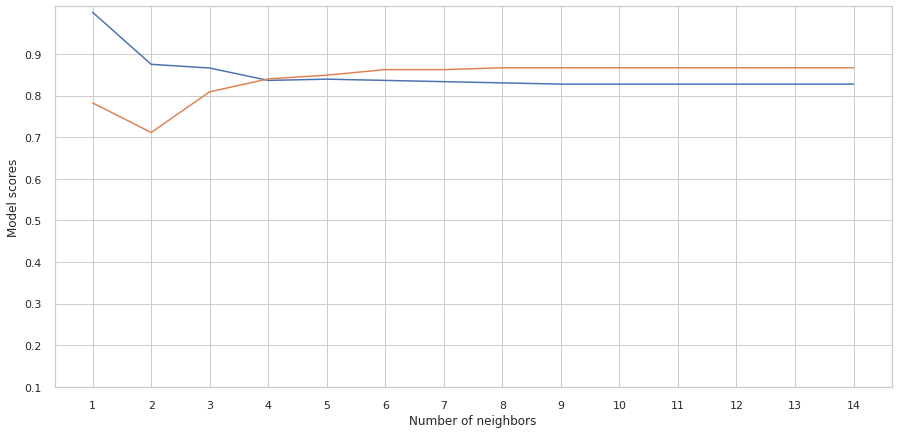

In [ ]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,15,1))
plt.yticks(np.arange(0.1,1,0.1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend;

In [ ]:
#Hyperparameter grid for Logistic Regression
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]}
#Hyperparameter grid for Random Forest
rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [ ]:
#Tune LogReg model
np.random.seed(1)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#Fit random hyperparameter search model to LogReg
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
#Let's check the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0018329807108324356}

In [ ]:
rs_log_reg.score(X_test,y_test)

0.8666666666666667

In [ ]:
knn.score(X_test,y_test)

0.8666666666666667

In [ ]:
#Tune Random Forest model
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        n_iter=20,
                        verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [ ]:
rs_rf.score(X_test,y_test)

0.8666666666666667

In [ ]:
y_preds=knn.predict(X_test)
preds_df=pd.DataFrame(y_preds)
preds_df.head()

,0
0,8
1,8
2,8
3,8
4,8


In [ ]:
#Check actual vs predictions
comparison=pd.DataFrame(data={"actual":y_preds,"prediction":y_test})
comparison.sample(9)

,actual,prediction
337,8,8
344,8,8
318,8,8
587,8,8
72,8,8
175,8,8
288,8,8
205,8,8
568,8,8


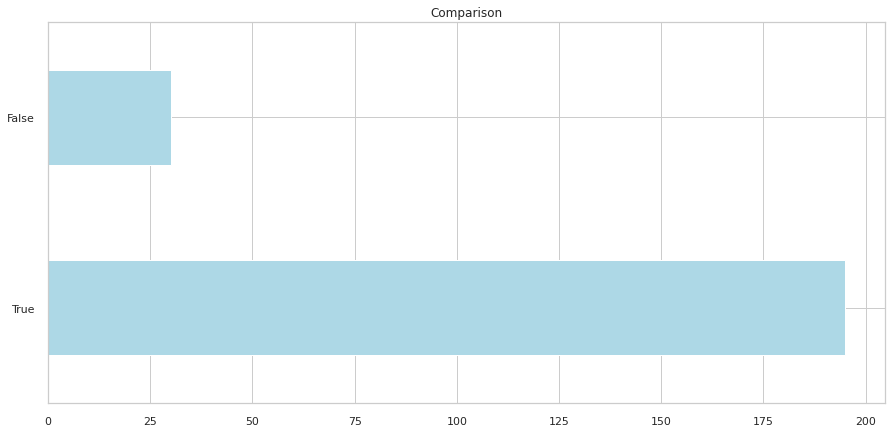

In [ ]:
#Calculate number of true and false predictions
comparison["result"]=comparison["actual"]==comparison["prediction"]
comparison["result"].value_counts().plot(kind="barh",color=["lightblue"],title="Comparison");

In [ ]:
#Classification report for precision, recall, f1score and accuracy
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.87      1.00      0.93       195
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         5

    accuracy                           0.87       225
   macro avg       0.09      0.10      0.09       225
weighted avg       0.75      0.87      0.80       225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
feat=RandomForestClassifier(n_estimators= 460,       #Using best params obtained earlier
                            min_samples_split= 6,
                            min_samples_leaf= 9,
                            max_depth= None)
feat.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=9, min_samples_split=6,
                       n_estimators=460)

In [ ]:
feat.feature_importances_

array([0.08392929, 0.15822024, 0.07270751, 0.14341098, 0.07456935,
       0.11744555, 0.07346597, 0.07761711, 0.05592121, 0.14271279])

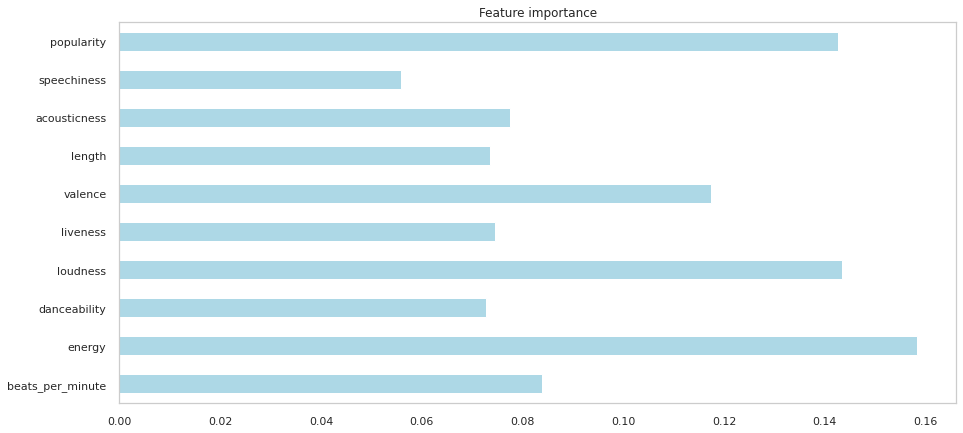

In [ ]:
#Match coefficients of features to columns
feature_dict=dict(zip(X,list(feat.feature_importances_)))
#Vizualize the feature importance
feature_data=pd.DataFrame(feature_dict,index=[0])
feature_data.T.plot.barh(title="Feature importance",legend=False,color="lightblue",grid=False);

######New Data

In [ ]:
Songs_df['genre_encoded'].value_counts()

8     473
2      15
5      13
1      10
7       9
3       9
9       8
10      7
4       6
0       6
6       5
Name: genre_encoded, dtype: int64

In [ ]:
Songs_df['genre_encoded']==4

0      False
1      False
2      False
3      False
4      False
       ...  
598    False
599    False
600    False
601    False
602    False
Name: genre_encoded, Length: 561, dtype: bool

In [ ]:
Songs_df.head()

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,genre_encoded
0,"""Hey, Soul Sister""",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,7
1,Love The Way You Lie,Eminem,hip hop,2010,87,93,75,-5,52,64,263,24,23,82,5
2,TiK ToK,Kesha,pop,2010,120,84,76,-3,29,71,200,10,14,80,8
3,Bad Romance,Lady Gaga,pop,2010,119,92,70,-4,8,71,295,0,4,79,8
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,8


In [ ]:
Songs_df.sample(5) 

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,genre_encoded
564,Filthy,Justin Timberlake,pop,2018,97,58,75,-6,25,65,294,4,14,62,8
321,BO$$,Fifth Harmony,pop,2015,103,87,81,-5,5,74,171,1,11,66,8
377,Work,Rihanna,pop,2016,92,53,73,-6,9,56,219,8,9,78,8
198,Pom Poms,Jonas Brothers,boy band,2013,148,98,68,-2,28,90,198,7,9,52,2
539,Bad Liar,Selena Gomez,pop,2018,121,41,97,-6,8,73,215,19,7,75,8


In [ ]:
scale = StandardScaler()
X_test = scale.fit_transform(X_test)
model = rs_log_reg
model.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
X_test =np.reshape([87,93,75,-5,52,64,263,24,23,82],(1,10)) 
X_test = scale.transform(X_test)


In [ ]:
y_preds=rs_log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
print(y_preds)

[8]


In [ ]:
scale = StandardScaler()
X_test = scale.fit_transform(X_test)
model = rs_log_reg
model.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
X_test =np.reshape([174,78,29,-3,7,62,216,2,7,56],(1,10)) 
X_test = scale.transform(X_test)

In [ ]:
y_preds=rs_log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
print(y_preds)

[9]


In [ ]:
X_test =np.reshape([120,93,72,-4,8,74,225,17,6,66],(1,10)) 
X_test = scale.transform(X_test)

In [ ]:
y_preds=knn.predict(X_test)

In [ ]:
print(y_preds)

[8]


##for popularity prediction

####Linear regression

In [ ]:
#Linear regression, first create test and train dataset
num_data=Songs_df.drop(["song","artist","genre","year"],axis=1) #drop all non-numeric columns
x=num_data.drop("popularity",axis=1)
y=num_data["popularity"]

In [ ]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

In [ ]:
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

98.11539649027407
[-0.05653924 -0.16472827  0.01693497  1.03280398 -0.09382652  0.04284832
 -0.02255932 -0.02514708 -0.09494228 -0.4825865 ]


In [ ]:
#Displaying the difference between the actual and the predicted
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

     Actual  Predicted
565      57  66.041530
187      59  61.154499
592      81  65.978152
546      72  67.800224
168      70  60.780089
..      ...        ...
25       65  61.273528
465      75  65.356947
212      80  66.227287
345      52  66.765261
543      72  65.611809

[225 rows x 2 columns]


In [ ]:
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.48835079267673
Mean Squared Error: 230.31597915476058
Root Mean Squared Error: 15.176164836834126


Text(0, 0.5, 'Test values')

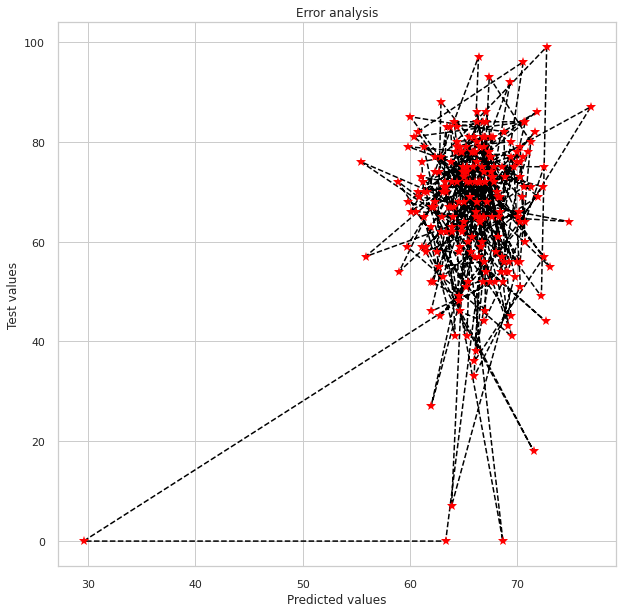

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

####KNN model

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
x_train=sc.transform(X_train)
x_test=sc.transform(X_test)

In [ ]:
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

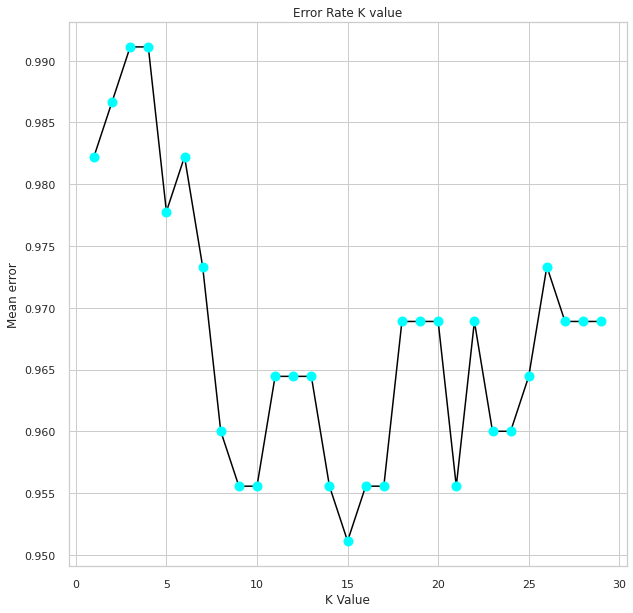

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),error,color='black',marker='o',markerfacecolor='cyan',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

####GNB model

In [ ]:
num_data=Songs_df.drop(["song","artist","genre","year"],axis=1) #drop all non-numeric columns
x=num_data.drop("popularity",axis=1)
y=num_data["popularity"]

In [ ]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred=GNB.predict(X_test)
df_output2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output2)

     Actual  Predicted
200      50         65
213      79         66
424      54         63
153      75         66
276      80         63
..      ...        ...
36       61         63
318      67         69
58       76         54
335      61         44
52       80         86

[225 rows x 2 columns]


In [ ]:
df_output2

,Actual,Predicted
200,50,65
213,79,66
424,54,63
153,75,66
276,80,63
...,...,...
36,61,63
318,67,69
58,76,54
335,61,44


In [ ]:
#Check actual vs predictions
comparison=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred })
comparison.sample()

,Actual,Predicted
476,71,65


In [ ]:
# Testing the accuracy of Naive Bayes 
scores1=cross_val_score(GNB,X_train,y_train,scoring='accuracy',cv=3).mean()*100
model_scores1=scores1
print(scores1)

2.083333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



In [ ]:
sns.jointplot(x=y_test, y=y_pred, kind="kde", color="r")

Error in callback <function flush_figures at 0x7fe869e27f80> (for post_execute):


KeyboardInterrupt: ignored

####Linear SVM model 

In [ ]:
num_data=Songs_df.drop(["song","artist","genre","year"],axis=1) #drop all non-numeric columns
x=num_data.drop("popularity",axis=1)
y=num_data["popularity"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40 )

In [ ]:
# Linear SVM model 
LinSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
LinSVC.fit(X_train, y_train)
y_pred=GNB.predict(X_test)
df_output3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output3)

     Actual  Predicted
424      54         63
46       52         69
284      77         56
232      68         63
499      54         54
..      ...        ...
133      61         66
587      85         66
127      68         66
13       73         66
281      77         66

[225 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
#Check actual vs predictions
comparison=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred })
comparison.sample()

,Actual,Predicted
350,50,67


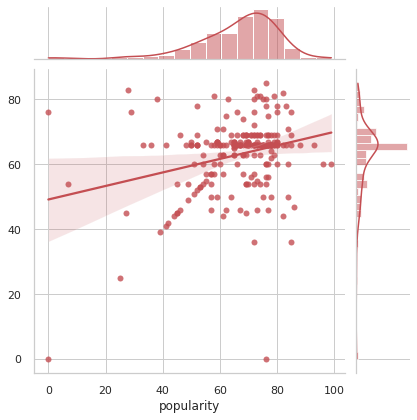

In [ ]:
sns.jointplot(x=y_test, y=y_pred, kind="reg", color="r");

In [ ]:
# Testing the accuracy
scores2=cross_val_score(LinSVC,X_train,y_train,scoring='accuracy',cv=3).mean()*100
model_scores2=scores2
print(scores2)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



2.6785714285714284


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



####Comparison  SVM && GNP

In [ ]:
A={
    'GNB':model_scores1,
   'SVM':model_scores2
} 

In [ ]:
A

{'GNB': 2.083333333333333, 'SVM': 2.6785714285714284}

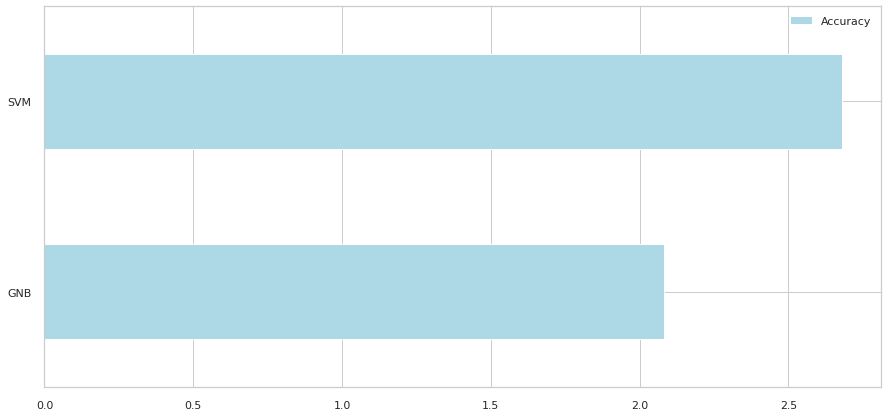

In [ ]:
model_compare=pd.DataFrame(A,index=["Accuracy"])
model_compare.T.plot.barh(color=["lightblue"]);

In [ ]:
y_preds=knn.predict(X_test)
preds_df=pd.DataFrame(y_preds)
preds_df.head()

,0
0,69
1,69
2,80
3,65
4,72


In [ ]:
#Check actual vs predictions
comparison=pd.DataFrame(data={'Actual': y_test, 'Predicted':y_pred })
comparison.head()

,Actual,Predicted
424,54,63
46,52,69
284,77,56
232,68,63
499,54,54


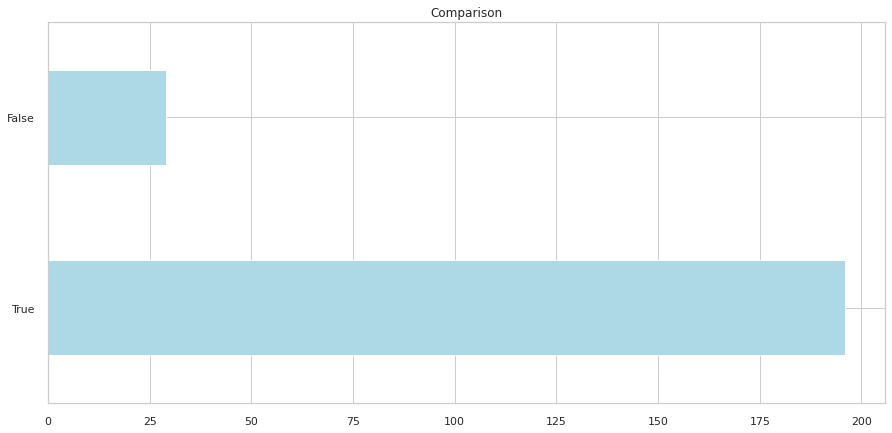

In [ ]:
#Calculate number of true and false predictions
comparison["result"]=comparison["Actual"]!=comparison["Predicted"]
comparison["result"].value_counts().plot(kind="barh",color=["lightblue"],title="Comparison");

In [ ]:
Songs_df

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,genre_encoded
0,"""Hey, Soul Sister""",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,7
1,Love The Way You Lie,Eminem,hip hop,2010,87,93,75,-5,52,64,263,24,23,82,5
2,TiK ToK,Kesha,pop,2010,120,84,76,-3,29,71,200,10,14,80,8
3,Bad Romance,Lady Gaga,pop,2010,119,92,70,-4,8,71,295,0,4,79,8
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,pop,2019,104,66,61,-7,20,16,176,1,3,75,8
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75,8
600,"""No Brainer (feat. Justin Bieber, Chance the R...",DJ Khaled,pop,2019,136,76,53,-5,9,65,260,7,34,70,8
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,pop,2019,114,79,60,-6,42,24,217,1,7,69,8


####Classification report for Precision

In [ ]:
#Classification report for precision, recall, f1score and accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         1
          25       1.00      1.00      1.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          39       1.00      1.00      1.00         1
          41       1.00      0.50      0.67         2
          42       1.00      1.00      1.00         1
          44       0.33      1.00      0.50         1
          45       0.50      0.67      0.57         3
          46       0.17      0.50      0.25         2
          47       0.00      0.00      0.00         0
          48       0.00      0.00      0.00         1
          49       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

####New Data

In [ ]:
scale = StandardScaler()
X_test = scale.fit_transform(X_test)
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
X_test =np.reshape([62,	70,	-7,	16,	72,	193,	8,	25,67,8],(1,10)) 
X_test = scale.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
y_pred= model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
print(y_pred)

[108.09204761]


#Playlist Creator

In [ ]:
# Finding out the skew for each feature

skew = num_data.skew()

print(skew)

In [ ]:
# scale the data

scaler = StandardScaler()

df_scaled = scaler.fit_transform(num_data)

df_scaled = pd.DataFrame(df_scaled)

df_scaled.head()

In [ ]:
# Plot to show the difference

plt.hist(num_data['speechiness'], bins=10)                    #original data
plt.show()

plt.hist(df_scaled.iloc[8], bins=10)                            #standardized data
plt.show()

In [ ]:
# choose the best number of clusters using elbow method and inertia
from sklearn.cluster import KMeans
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

inertias = []

for i in k:
    km = KMeans(n_clusters=i, max_iter=1000, random_state=42)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

plt.plot(k, inertias)
plt.xlabel("Value for k")
plt.ylabel("Inertias")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

score=[]

for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    score.append(silhouette_score(df_scaled, kmeans.labels_))
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

In [ ]:
# plot cluster options
plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.show()

In [ ]:
# set number of clusters

kclusters = 8


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=42).fit(df_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

In [ ]:
# add clustering labels to dataframe

Songs_df.insert(0, 'Playlist Number', kmeans.labels_)

Songs_df.head()    # check out the Cluster Labels column!

##Club Songs

In [ ]:
Songs_df.loc[Songs_df['Playlist Number'] == 0, Songs_df.columns[[1, 2]]]

##Dancy Songs

In [ ]:
Songs_df.loc[Songs_df['Playlist Number'] == 1, Songs_df.columns[[1, 2]]]

##Heart Melting Songs

In [ ]:
Songs_df.loc[Songs_df['Playlist Number'] == 3, Songs_df.columns[[1, 2]]]

**bold text**##Party Songs

In [ ]:
Songs_df.loc[Songs_df['Playlist Number'] == 4, Songs_df.columns[[1, 2]]]

##Breakup Songs

In [ ]:
Songs_df.loc[Songs_df['Playlist Number'] == 5, Songs_df.columns[[1, 2]]]

##Good energy songs

In [ ]:
Songs_df.loc[Songs_df['Playlist Number'] == 6, Songs_df.columns[[1, 2]]]

##Girl Power Songs

In [ ]:
Songs_df.loc[Songs_df['Playlist Number'] == 7, Songs_df.columns[[1, 2]]].sample(7)